[*********************100%%**********************]  1 of 1 completed


NVIDIA stock price has increased by 16413.97% over the past 10 years.


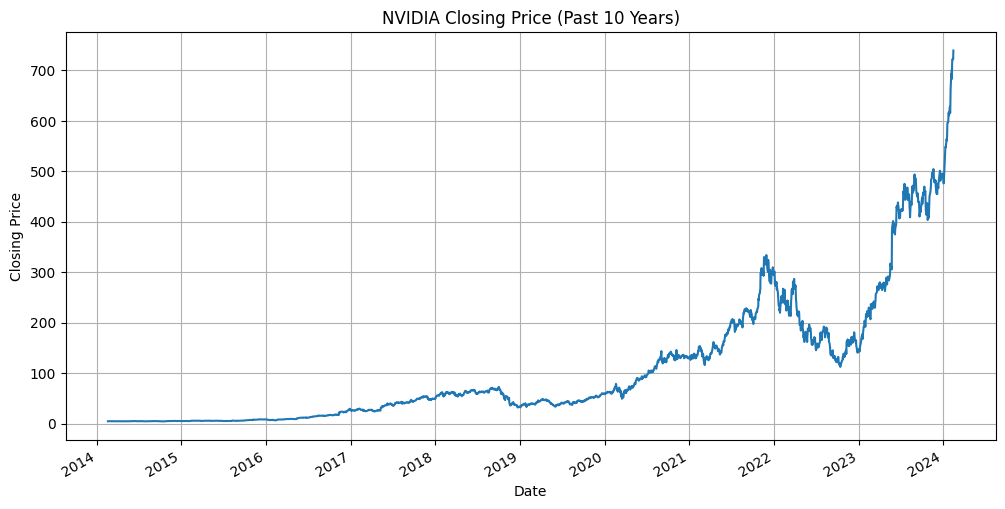

In [2]:
import yfinance as yf
from datetime import datetime, timedelta

# Get today's date
today = datetime.today()

# Determine date 10 years ago
ten_years_ago = today - timedelta(days=365 * 10)

# Download NVIDIA stock data
nvidia_data = yf.download("NVDA", start=ten_years_ago.strftime("%Y-%m-%d"), end=today.strftime("%Y-%m-%d"))

# Check if any data was downloaded
if len(nvidia_data) == 0:
    print("No data found for NVIDIA during the specified period.")
else:
    # Calculate closing price at the beginning and end of the period
    start_price = nvidia_data.iloc[0]["Close"]
    end_price = nvidia_data.iloc[-1]["Close"]

    # Calculate percentage increase
    price_increase = (end_price - start_price) / start_price * 100

    # Print the results
    print(f"NVIDIA stock price has increased by {price_increase:.2f}% over the past 10 years.")

    # Optionally, visualize the price movement (using Matplotlib for compatibility)
    import matplotlib.pyplot as plt
    nvidia_data["Close"].plot(figsize=(12, 6))
    plt.title("NVIDIA Closing Price (Past 10 Years)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.grid(True)
    plt.show()


In [34]:
import yfinance as yf
from datetime import datetime, timedelta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Get today's date
today = datetime.today()

# Determine date two years ago
two_years_ago = today - timedelta(days=365 * 2)

# Download NVIDIA data
nvidia_data = yf.download("NVDA", start=two_years_ago.strftime("%Y-%m-%d"), end=today.strftime("%Y-%m-%d"))

# Convert data to NumPy array
data = nvidia_data["Close"].to_numpy()

from sklearn.preprocessing import MinMaxScaler

# Normalize data (e.g., min-max scaling)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

# Create sequences for LSTM
sequence_length = 50  # adjust as needed
sequences = []
for i in range(len(data) - sequence_length):
    sequences.append(data[i:(i + sequence_length)])

# Convert sequences to NumPy arrays
sequences = np.array(sequences)

# Split data into training and testing sets
train_size = int(len(sequences) * 0.8)
X_train, X_test, y_train, y_test = sequences[:train_size], sequences[train_size:], data[:train_size], data[train_size:]

# Reshape data for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# ... (rest of your code up to the prediction part) ...

# Create a NumPy array with the predicted price and reshape it (adjust size as needed)
future_data = np.array([[pred]])  # reshape to (1, 1)

# Predict prices for the next two years (adjust steps accordingly)
predictions = []
for i in range(730):  # adjust based on the number of days in 2 years
    pred = model.predict(future_data)
    predicted_price = scaler.inverse_transform(pred.reshape(-1, 1))[0][0]
    predictions.append(predicted_price)

    # Reshape the predicted price and append it to future_data consistently
    future_data = np.array([[pred]])  # reshape to (1, 1)

# Plot predictions
import matplotlib.pyplot as plt
plt.plot(data, label="Actual Price")
plt.plot(range(len(data), len(data) + len(predictions)), predictions, label="Predicted Price")
plt.legend()
plt.show()




[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
12/12 [==============================] - 4s 44ms/step - loss: 0.0186
Epoch 2/100
12/12 [==============================] - 1s 43ms/step - loss: 0.0066
Epoch 3/100
12/12 [==============================] - 1s 44ms/step - loss: 0.0055
Epoch 4/100
12/12 [==============================] - 0s 40ms/step - loss: 0.0052
Epoch 5/100
12/12 [==============================] - 1s 54ms/step - loss: 0.0050
Epoch 6/100
12/12 [==============================] - 1s 71ms/step - loss: 0.0048
Epoch 7/100
12/12 [==============================] - 1s 69ms/step - loss: 0.0044
Epoch 8/100
12/12 [==============================] - 1s 68ms/step - loss: 0.0041
Epoch 9/100
12/12 [==============================] - 1s 42ms/step - loss: 0.0040
Epoch 10/100
12/12 [==============================] - 0s 41ms/step - loss: 0.0036
Epoch 11/100
12/12 [==============================] - 1s 42ms/step - loss: 0.0034
Epoch 12/100
12/12 [==============================] - 0s 41ms/step - loss: 0.0028
Epoch 13/100
12/12 [=====

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_2' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_2' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [36]:
# Create a NumPy array with the last sequence of data and reshape it (adjust size as needed)
future_data = X_test[-1].reshape((1, sequence_length, 1))

# Predict prices for the next two years (adjust steps accordingly)
predictions = []
for i in range(730):  # adjust based on the number of days in 2 years
    pred = model.predict(future_data)
    predictions.append(pred[0, 0])  # append the prediction to the list

    # Update future_data by removing the first element and appending the prediction
    future_data = np.append(future_data[:, 1:, :], pred.reshape((1, 1, 1)), axis=1)

# Convert predictions to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot predictions
plt.plot(np.arange(len(data)), np.concatenate([data, predictions]), label="Actual and Predicted Price")
plt.legend()
plt.show()


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_2' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_2' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None
